In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

In [23]:
beta_on = 2e13
beta_off = 1e-3
t_0 = 1.44e4
T_0 = 4.15e-16
f_k1 = 1

v_1 = beta_on*t_0*T_0
v_20 = beta_off*t_0
v_21 = (beta_off)**2*t_0

In [24]:
def model(t, z, mu):

    dS = -f_k1*(3*z[1]/4)
    dC = v_1*(mu - z[1])*(z[0] - z[1]) - v_20*(z[1]/4) - v_21*(3*z[1]/4) - f_k1*(z[1]/2)
    dz = [dS, dC]

    return dz

In [25]:
z_0 = [1, 0]
mu = 20
t= np.geomspace(0.00000001, 1, 1000)
t_span = [0.00000001, 1]

z = solve_ivp(model, t_span, z_0, args = (mu, ), method = 'Radau', t_eval = t )

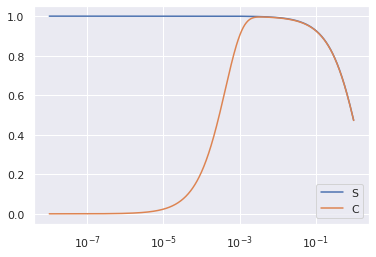

In [26]:
S = z.y[0]
C = z.y[1]

sns.set_theme()

plt.semilogx(t, S, label = 'S')
plt.semilogx(t, C, label = 'C')
plt.legend()
plt.show()